In [1]:
from closure_funcs import *
import numpy as np
from scipy.optimize import root_scalar
from matplotlib import pyplot as plt
import pandas as pd
from tqdm import tqdm
from joblib import Parallel, delayed
from scipy.stats import linregress
import matplotlib.colors as mcolors

In [4]:
d = pd.read_csv('.../tables/merged_observed.csv')

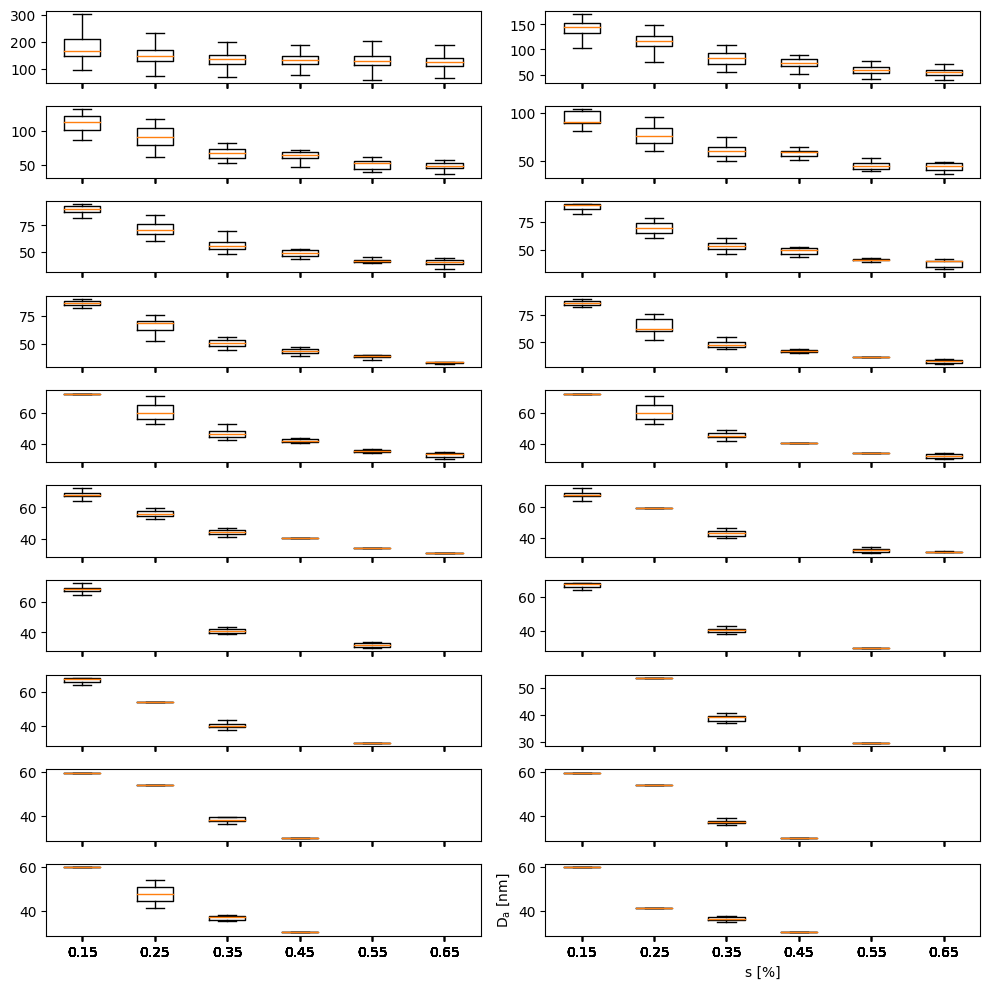

In [5]:
min_k = np.arange(0,2,.1)
fig, axes = plt.subplots(10, 2, figsize=(10,10), sharex=True)
for i, ax in enumerate(fig.axes):
    d_p = d[(d['k_obs']>min_k[i]) & (d['k_obs']<min_k[i]+.5)]
    min_s = np.arange(.1,.7,.1)
    max_s = np.arange(.2,.8,.1)
    s_labels = np.arange(.15,.75,.1).round(2)
    #s_labels = (min_o + max_o) / 2

    Ks = []
    for i in range(0,len(min_s)):
        Ks.append(d_p['D_a'][(d['CCN_SS'] < max_s[i]) & (d_p['CCN_SS'] >= min_s[i])].dropna())

    ax.boxplot(Ks, labels=s_labels,showfliers=False)


plt.ylabel(r'D$_{\rm a}$ [nm]')
plt.xlabel('s [%]')
plt.tight_layout()